# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Kandika Prima Putra
- Email: kandikaprima@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [29]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [8]:
df = pd.read_csv("dataset\data.csv", sep=";")

## Data Understanding

### Mengecek data

In [9]:
df.head() 

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Mengecek Informasi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Mengecek missing value

In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Data Visualisasi

In [10]:
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
status_counts = df['Status'].value_counts()
admission_grade_dist = df['Admission_grade']
avg_grade_by_status = df.groupby('Status')['Admission_grade'].mean().sort_values()

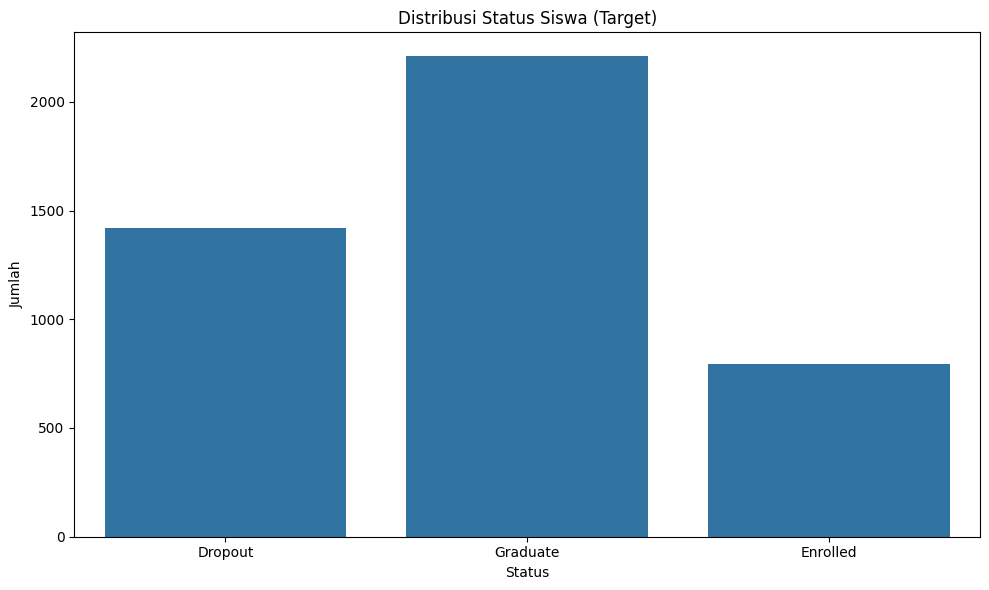

In [ ]:
plt.figure()
sns.countplot(x='Status', data=df)
plt.title("Distribusi Status Siswa (Target)")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

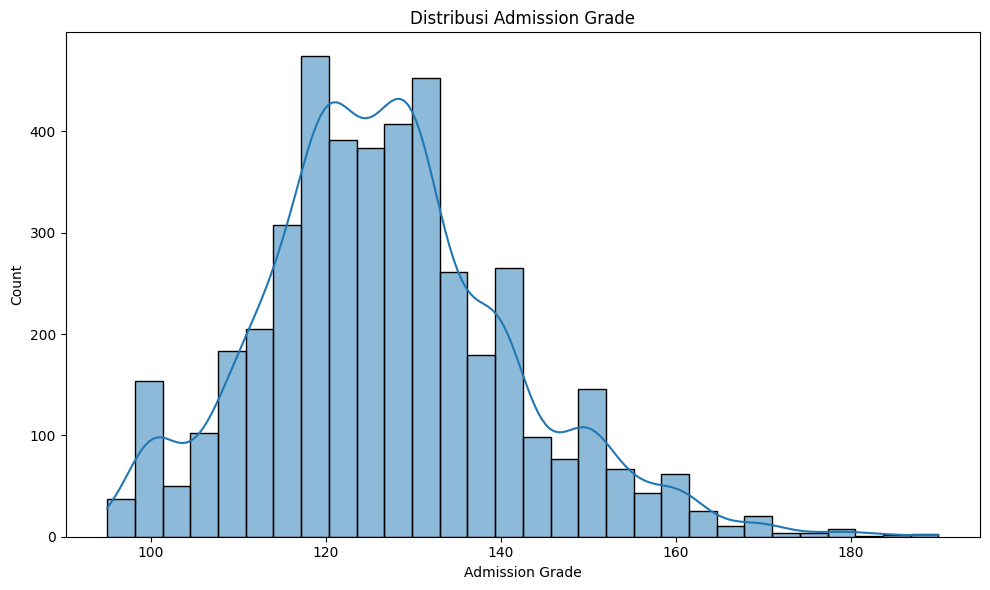

In [13]:
plt.figure()
sns.histplot(admission_grade_dist, bins=30, kde=True)
plt.title("Distribusi Admission Grade")
plt.xlabel("Admission Grade")
plt.tight_layout()
plt.show()

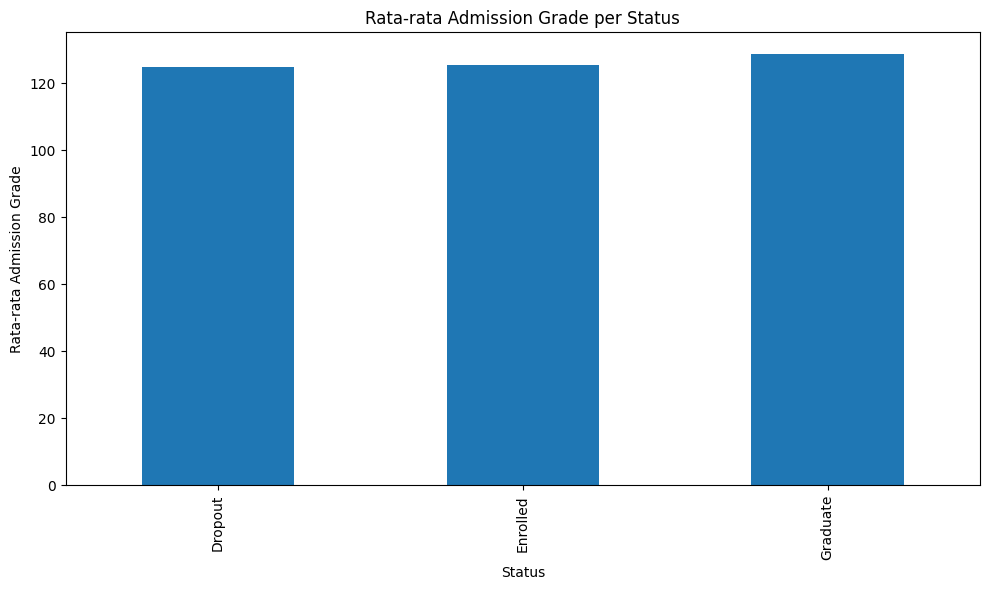

In [ ]:
plt.figure()
avg_grade_by_status.plot(kind='bar')
plt.title("Rata-rata Admission Grade per Status")
plt.ylabel("Rata-rata Admission Grade")
plt.xlabel("Status")
plt.tight_layout()
plt.show()

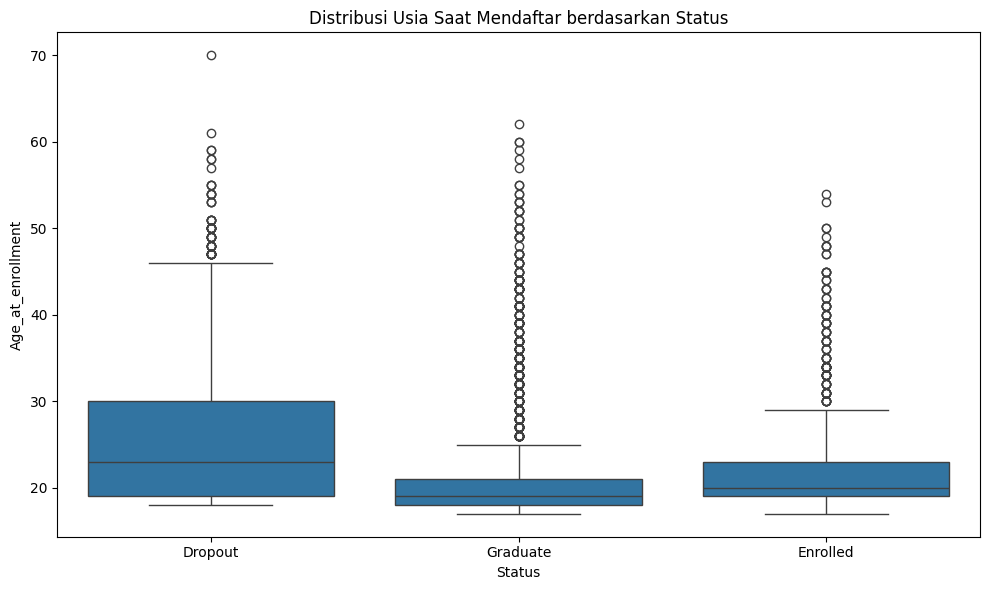

In [15]:
plt.figure()
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title("Distribusi Usia Saat Mendaftar berdasarkan Status")
plt.tight_layout()
plt.show()

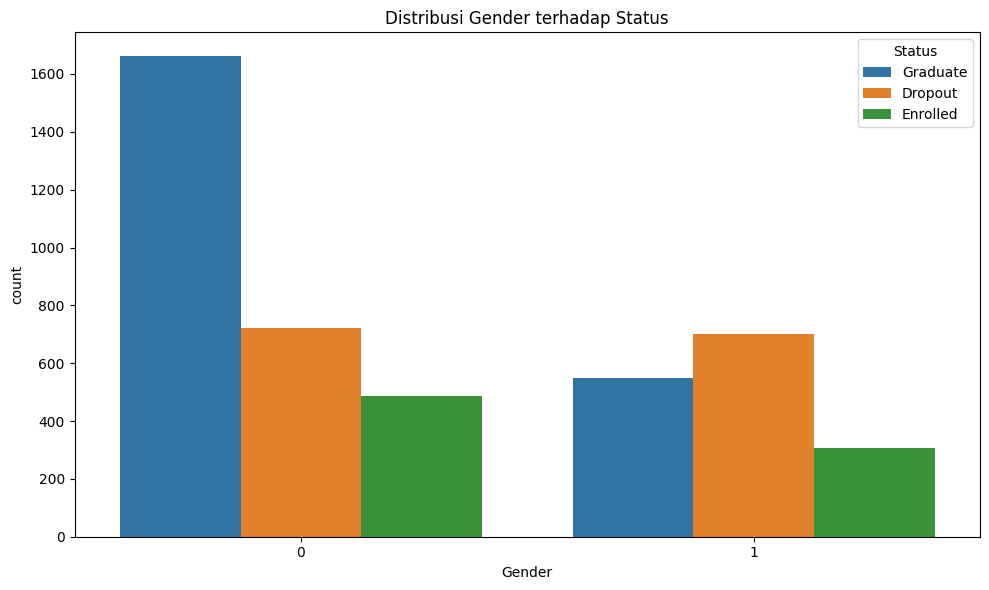

In [16]:
plt.figure()
sns.countplot(x='Gender', hue='Status', data=df)
plt.title("Distribusi Gender terhadap Status")
plt.tight_layout()
plt.show()

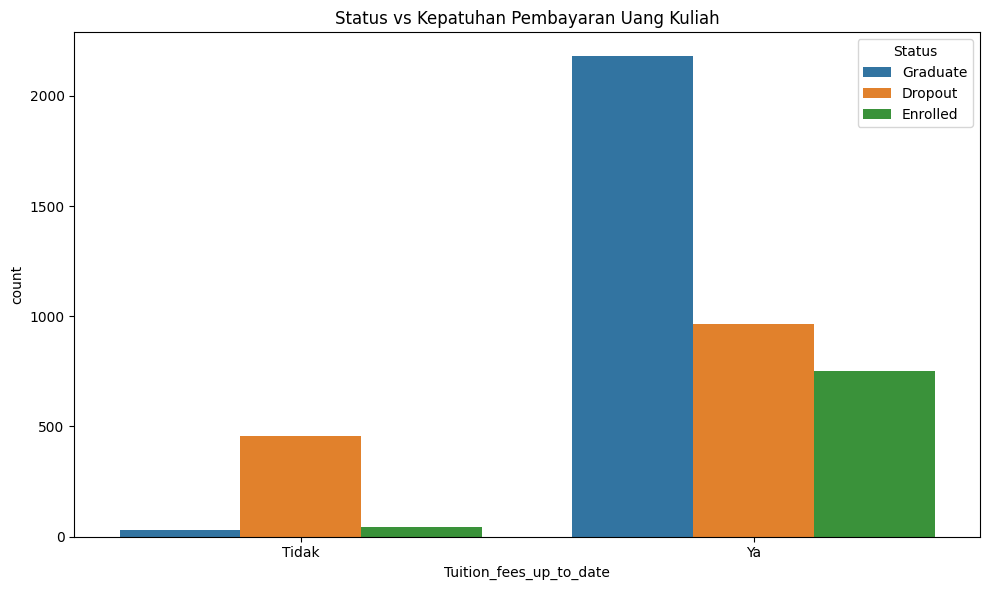

In [17]:
plt.figure()
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df)
plt.title("Status vs Kepatuhan Pembayaran Uang Kuliah")
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

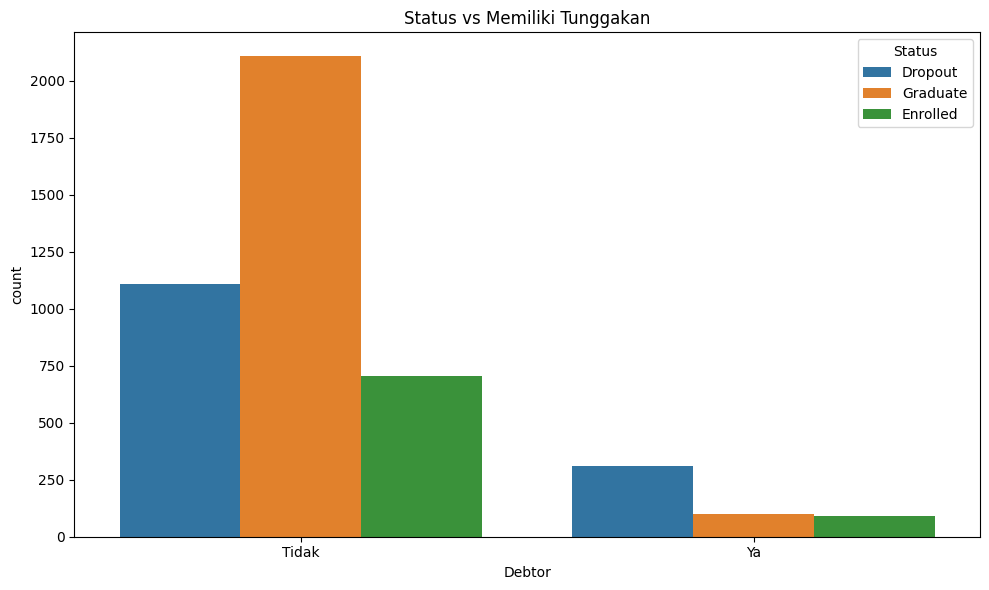

In [18]:
plt.figure()
sns.countplot(x='Debtor', hue='Status', data=df)
plt.title("Status vs Memiliki Tunggakan")
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [20]:
data = df.copy()

In [21]:
data['Target'] = data['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [22]:
data = data.drop(columns=['Status'])

In [23]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [24]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [25]:
X = data.drop(columns=['Target'])
y = data['Target']

In [26]:
numeric_cols = [col for col in numeric_cols if col != 'Target']

In [27]:
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((3539, 36),
 (885, 36),
 Target
 0    2402
 1    1137
 Name: count, dtype: int64,
 Target
 0    601
 1    284
 Name: count, dtype: int64)

## Modeling

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf.predict(X_test)

## Evaluation

In [35]:
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [33]:
print("=== Confusion Matrix ===")
print(conf_matrix)

=== Confusion Matrix ===
[[577  24]
 [ 77 207]]


In [36]:
print("\n=== Classification Report ===")
print(class_report)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.90      0.73      0.80       284

    accuracy                           0.89       885
   macro avg       0.89      0.84      0.86       885
weighted avg       0.89      0.89      0.88       885



## Save Model

In [37]:
model_path = "models\dropout_rf_model.pkl"
joblib.dump(rf, model_path)

['models\\dropout_rf_model.pkl']